# Image Processing Pipeline

## 1. Image Segmentation Through K-Means

In [1]:
# Modules
##########
import cv2                         # cv2: Open Source Computer Vision Library
import matplotlib.pyplot as plt    # matplotlib: 2D plotting library
import numpy as np                 # numpy: the fundamental package for scientific computing

from sklearn.cluster import KMeans # scikit-learn: Simple and efficient tools for data mining and data analysis

In [1]:
# Variables
############
imagePath = './sample.png'

In [3]:
# Functions
############
def cvtToC1C2C3(image):
    # Change image type to float32
    newImage = image.astype(np.float32) + 0.001 # To avoid division by 0

    # Convert to c1c2c3 color space
    # (c1 = arctan(R / max(G, B)))
    # (c2 = arctan(G / max(R, B)))
    # (c3 = arctan(B / max(R, G)))
    c1c2c3 = np.arctan(newImage/np.dstack((cv2.max(newImage[...,1], newImage[...,2]), cv2.max(newImage[...,0], newImage[...,2]), cv2.max(newImage[...,0], newImage[...,1]))))

    return c1c2c3

### Choosing the sample and color spaces

Loading one of the obtained samples and testing the K-Means algorithm with multiple color spaces:

1. RGB;
2. HSV;
3. c1c2c3;
4. LAB;

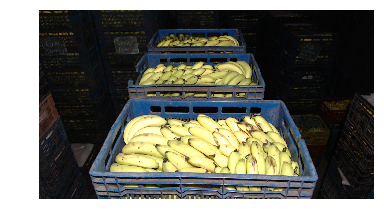

In [4]:
# Loading and showing image
originalImageBGR = cv2.imread(imagePath)
originalImageRGB = cv2.cvtColor(originalImageBGR, cv2.COLOR_BGR2RGB)

# Storing original dimensions
xLen = len(originalImageBGR)
yLen = len(originalImageBGR[0])

# Converting image to multiple color spaces
imageRGB = originalImageRGB.copy()
imageHSV = cv2.cvtColor(originalImageBGR, cv2.COLOR_BGR2HSV)
imageC1C2C3 = cvtToC1C2C3(imageRGB)
imageLAB = cv2.cvtColor(originalImageBGR, cv2.COLOR_BGR2LAB)

plt.figure()
plt.axis("off")
plt.imshow(originalImageRGB)

### Pre-Processing stage

In [5]:
# Splitting images
imageR, imageG, imageB = cv2.split(imageRGB)
imageH, imageS, imageV = cv2.split(imageHSV)
imageC1, imageC2, imageC3 = cv2.split(imageC1C2C3)
imageLl, imageAl, imageBl = cv2.split(imageLAB)

In [6]:
# Reshaping images to lists of pixels
reshapedImageRGB = imageRGB.reshape((imageRGB.shape[0] * imageRGB.shape[1], 3))
reshapedImageHSV = imageHSV.reshape((imageHSV.shape[0] * imageHSV.shape[1], 3))
reshapedImageC1C2C3 = imageC1C2C3.reshape((imageC1C2C3.shape[0] * imageC1C2C3.shape[1], 3))
reshapedImageLAB = imageLAB.reshape((imageLAB.shape[0] * imageLAB.shape[1], 3))

reshapedImageR = imageR.reshape((imageR.shape[0] * imageR.shape[1], 1))
reshapedImageG = imageG.reshape((imageG.shape[0] * imageG.shape[1], 1))
reshapedImageB = imageB.reshape((imageB.shape[0] * imageB.shape[1], 1))

reshapedImageH = imageH.reshape((imageH.shape[0] * imageH.shape[1], 1))
reshapedImageS = imageS.reshape((imageS.shape[0] * imageS.shape[1], 1))
reshapedImageV = imageV.reshape((imageV.shape[0] * imageV.shape[1], 1))

reshapedImageC1 = imageC1.reshape((imageC1.shape[0] * imageC1.shape[1], 1))
reshapedImageC2 = imageC2.reshape((imageC2.shape[0] * imageC2.shape[1], 1))
reshapedImageC3 = imageC3.reshape((imageC3.shape[0] * imageC3.shape[1], 1))

reshapedImageLl = imageLl.reshape((imageLl.shape[0] * imageLl.shape[1], 1))
reshapedImageAl = imageAl.reshape((imageAl.shape[0] * imageAl.shape[1], 1))
reshapedImageBl = imageBl.reshape((imageBl.shape[0] * imageBl.shape[1], 1))

### Applying K-Means

In [7]:
# Creating K-Means object
clt = KMeans(n_clusters = 2, n_init = 1, random_state = 10, n_jobs = -1)

#### RGB Results

According to https://www.learnopencv.com/color-spaces-in-opencv-cpp-python/, the RGB colorspace has the following properties:
* It is an additive colorspace where colors are obtained by a linear combination of Red, Green, and Blue values.
* The three channels are correlated by the amount of light hitting the surface.

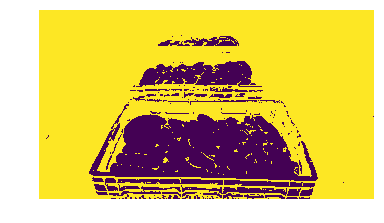

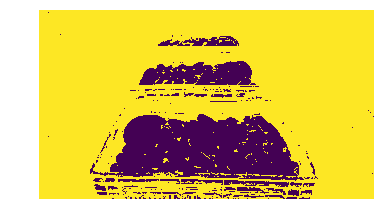

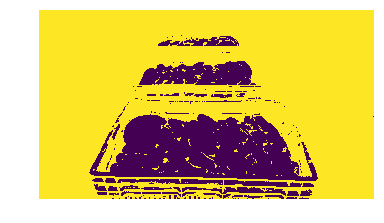

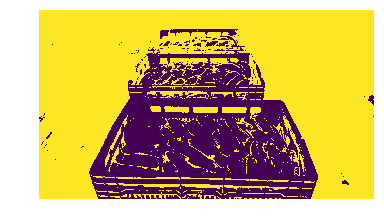

In [8]:
# Calculating K-Means for RGB
clt.fit(reshapedImageRGB)
labelsRGB = clt.labels_

clt.fit(reshapedImageR)
labelsR = clt.labels_
clt.fit(reshapedImageG)
labelsG = clt.labels_
clt.fit(reshapedImageB)
labelsB = clt.labels_

# Turning K-Means results into masks
maskRGB = np.uint8(labelsRGB).reshape((xLen, yLen))

maskR = np.uint8(labelsR).reshape((xLen, yLen))
maskG = np.uint8(labelsG).reshape((xLen, yLen))
maskB = np.uint8(labelsB).reshape((xLen, yLen))

plt.figure()
plt.axis("off")
plt.imshow(maskRGB)

plt.figure()
plt.axis("off")
plt.imshow(maskR)
plt.figure()
plt.axis("off")
plt.imshow(maskG)
plt.figure()
plt.axis("off")
plt.imshow(maskB)

#### HSV Results

According to https://www.learnopencv.com/color-spaces-in-opencv-cpp-python/, the HSV color space has the following three components:
1. H – Hue ( Dominant Wavelength ).
2. S – Saturation ( Purity / shades of the color ).
3. V – Value ( Intensity ).

Some of its properties:
* Best thing is that it uses only one channel to describe color (H), making it very intuitive to specify color.
* Device dependent.

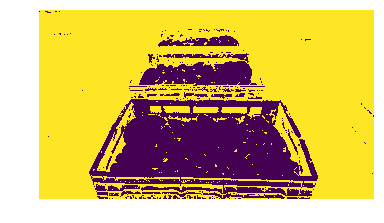

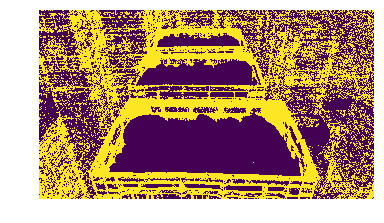

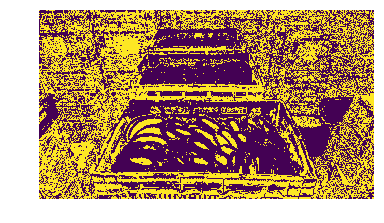

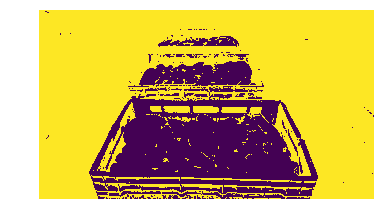

In [9]:
# Calculating K-Means for HSV
clt.fit(reshapedImageHSV)
labelsHSV = clt.labels_

clt.fit(reshapedImageH)
labelsH = clt.labels_
clt.fit(reshapedImageS)
labelsS = clt.labels_
clt.fit(reshapedImageV)
labelsV = clt.labels_

# Turning K-Means results into masks
maskHSV = np.uint8(labelsHSV).reshape((xLen, yLen))

maskH = np.uint8(labelsH).reshape((xLen, yLen))
maskS = np.uint8(labelsS).reshape((xLen, yLen))
maskV = np.uint8(labelsV).reshape((xLen, yLen))

plt.figure()
plt.axis("off")
plt.imshow(maskHSV)

plt.figure()
plt.axis("off")
plt.imshow(maskH)
plt.figure()
plt.axis("off")
plt.imshow(maskS)
plt.figure()
plt.axis("off")
plt.imshow(maskV)

#### c1c2c3 Results

Tests based on the article https://pdfs.semanticscholar.org/3a1c/431cb819dc5ced519a6be65d6b4a0658aeea.pdf

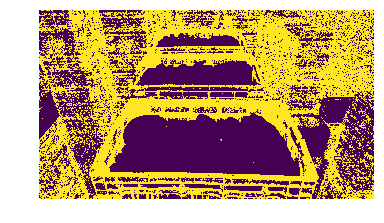

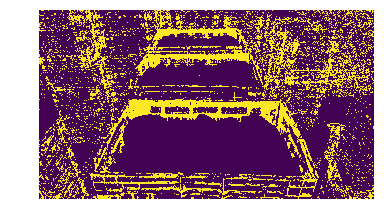

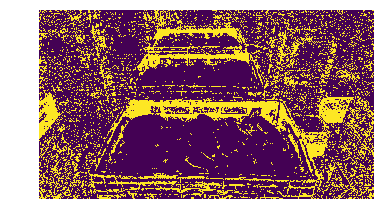

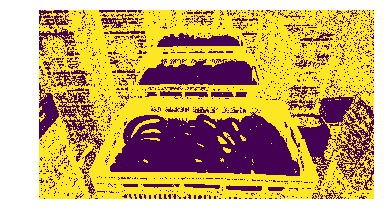

In [10]:
# Calculating K-Means for c1c2c3
clt.fit(reshapedImageC1C2C3)
labelsC1C2C3 = clt.labels_

clt.fit(reshapedImageC1)
labelsC1 = clt.labels_
clt.fit(reshapedImageC2)
labelsC2 = clt.labels_
clt.fit(reshapedImageC3)
labelsC3 = clt.labels_

# Turning K-Means results into masks
maskC1C2C3 = np.uint8(labelsC1C2C3).reshape((xLen, yLen))

maskC1 = np.uint8(labelsC1).reshape((xLen, yLen))
maskC2 = np.uint8(labelsC2).reshape((xLen, yLen))
maskC3 = np.uint8(labelsC3).reshape((xLen, yLen))

plt.figure()
plt.axis("off")
plt.imshow(maskC1C2C3)

plt.figure()
plt.axis("off")
plt.imshow(maskC1)
plt.figure()
plt.axis("off")
plt.imshow(maskC2)
plt.figure()
plt.axis("off")
plt.imshow(maskC3)

#### Lab Results

According to https://www.learnopencv.com/color-spaces-in-opencv-cpp-python/, the Lab color space has three components:
1. L – Lightness ( Intensity ).
2. a – color component ranging from Green to Magenta.
3. b – color component ranging from Blue to Yellow.

The Lab color space is quite different from the RGB color space. In RGB color space the color information is separated into three channels but the same three channels also encode brightness information. On the other hand, in Lab color space, the L channel is independent of color information and encodes brightness only. The other two channels encode color.

It has the following properties:
* Perceptually uniform color space which approximates how we perceive color.
* Independent of device ( capturing or displaying ).
* Used extensively in Adobe Photoshop.
* Is related to the RGB color space by a complex transformation equation.

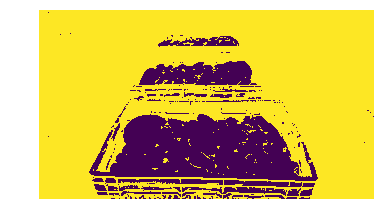

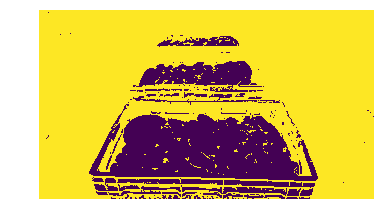

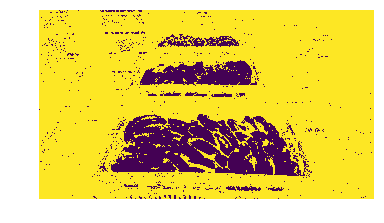

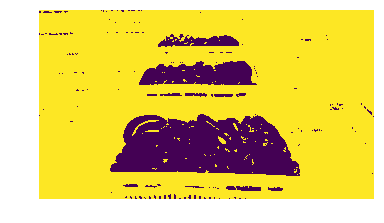

In [11]:
# Calculating K-Means for Lab
clt.fit(reshapedImageLAB)
labelsLAB = clt.labels_

clt.fit(reshapedImageLl)
labelsLl = clt.labels_
clt.fit(reshapedImageAl)
labelsAl = clt.labels_
clt.fit(reshapedImageBl)
labelsBl = clt.labels_

# Turning K-Means results into masks
maskLAB = np.uint8(labelsLAB).reshape((xLen, yLen))

maskLl = np.uint8(labelsLl).reshape((xLen, yLen))
maskAl = np.uint8(labelsAl).reshape((xLen, yLen))
maskBl = np.uint8(labelsBl).reshape((xLen, yLen))

plt.figure()
plt.axis("off")
plt.imshow(maskLAB)

plt.figure()
plt.axis("off")
plt.imshow(maskLl)
plt.figure()
plt.axis("off")
plt.imshow(maskAl)
plt.figure()
plt.axis("off")
plt.imshow(maskBl)

### Choosing best color space and applying mask

The color space that presented itself as the best one for our samples (bananas) was the the b component from the Lab color space. This can be explained considering that this component represents colors ranging from Blue to Yellow, a range that includes the banana color spectrum, green to yellow.

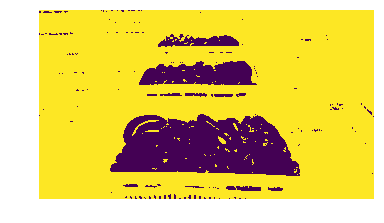

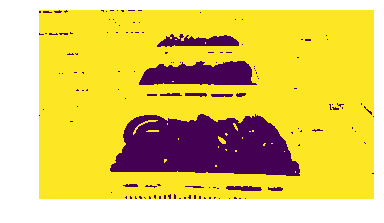

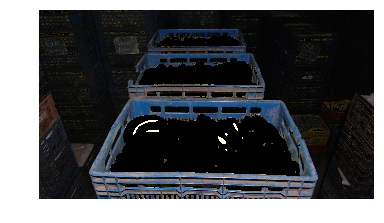

In [12]:
# Creating mask to apply to original image
finalMask = maskBl

plt.figure()
plt.axis("off")
plt.imshow(finalMask)

# Noise removal
kernel = np.ones((3,3), np.uint8)
finalMask = cv2.morphologyEx(finalMask, cv2.MORPH_OPEN, kernel, iterations = 3)

plt.figure()
plt.axis("off")
plt.imshow(finalMask)

# Applying mask to original image
clusteredImageBGR = cv2.bitwise_and(originalImageBGR.copy(), originalImageBGR.copy(), mask = finalMask)
clusteredImageRGB = cv2.cvtColor(clusteredImageBGR.copy(), cv2.COLOR_BGR2RGB)

plt.figure()
plt.axis("off")
plt.imshow(clusteredImageRGB)

### Verifying if the right label has been chosen

The right label is considered the one that generated a mask that results only on the samples appearing on the new image, not the other way around

Extracted components:
L_min: 0, L_max: 254
a_min: 110, a_max: 163
b_min: 77, b_max: 147
The label is wrong!


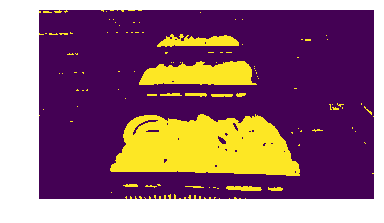

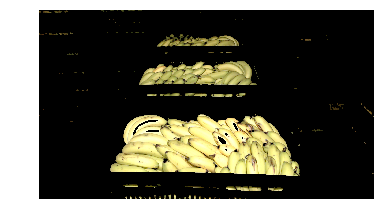

In [13]:
# Converting clusteredImage to Lab and splitting it
clusteredImageLab = cv2.cvtColor(clusteredImageBGR, cv2.COLOR_BGR2LAB)
cluster_L, cluster_a, cluster_b = cv2.split(clusteredImageLab)

# Formatting the components and removing 0s
cluster_L = cluster_L.flatten()
cluster_a = cluster_a.flatten()
cluster_b = cluster_b.flatten()

# Extract min and max from components
print("Extracted components:")
L_min = np.amin(cluster_L)
L_max = np.amax(cluster_L)
print( "L_min: {0}, L_max: {1}".format(L_min, L_max) )

a_min = np.amin(cluster_a)
a_max = np.amax(cluster_a)
print( "a_min: {0}, a_max: {1}".format(a_min, a_max) )

b_min = np.amin(cluster_b)
b_max = np.amax(cluster_b)
print( "b_min: {0}, b_max: {1}".format(b_min, b_max) )

# These are the threshold values for all components
L_minThreshold = 0
L_maxThreshold = 255

a_minThreshold = 90
a_maxThreshold = 175

b_minThreshold = 115
b_maxThreshold = 205

# Verifying if the chosen label was the right one based on the thresholds
if L_min >= L_minThreshold and L_max <= L_maxThreshold  and a_min >= a_minThreshold and a_max <= a_maxThreshold and b_min >= b_minThreshold and b_max <= b_maxThreshold:
    print("The label is OK!")
else:
    print("The label is wrong!")
    
    # Inverting mask
    finalMask = 1 - finalMask
 
    plt.figure()
    plt.axis("off")
    plt.imshow(finalMask)

    # Applying mask to original image
    clusteredImageBGR = cv2.bitwise_and(originalImageBGR.copy(), originalImageBGR.copy(), mask = finalMask)
    clusteredImageRGB = cv2.cvtColor(clusteredImageBGR.copy(), cv2.COLOR_BGR2RGB)

    plt.figure()
    plt.axis("off")
    plt.imshow(clusteredImageRGB)

## 2. Sample Detection

### Finding samples

Number of contours found: 227


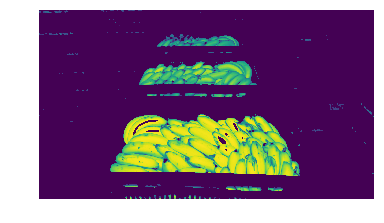

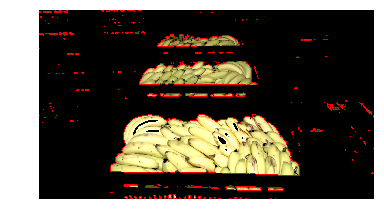

In [15]:
# Creates gray image from clusteredImage
grayImage = cv2.cvtColor(clusteredImageBGR, cv2.COLOR_BGR2GRAY);

plt.figure()
plt.axis("off")
plt.imshow(grayImage)

# Finding and drawing contours
im2, contours, hierarchy = cv2.findContours(grayImage.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print( "Number of contours found: {}".format( len(contours) ) )
contoursDrawing = cv2.drawContours(clusteredImageRGB.copy(), contours, -1, (255,0,0), 3)
plt.figure()
plt.axis("off")
plt.imshow(contoursDrawing)

### Generating masks from contours

Biggest area found: 295874.5, using as reference 29587.45


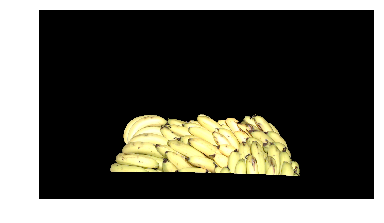

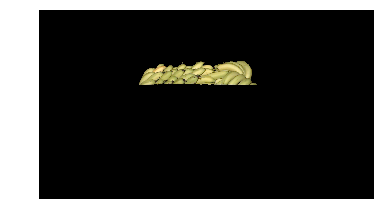

In [16]:
# For each contour, store its area
contourAreas = []
for contour in contours:
    contourAreas.append( cv2.contourArea(contour) )
contourAreas = np.array(contourAreas)

# Getting the contour with the biggest area to be used as reference
biggestArea = np.max(contourAreas)
referenceArea = 0.1 * biggestArea # 10% of the biggest area
print("Biggest area found: {0}, using as reference {1}".format(biggestArea, referenceArea))

# Getting the indexes of the areas that are higher or equal than the reference
acceptedAreasIndexes = np.argwhere(contourAreas >= referenceArea)
    
# For each accepted area, create a mask
maskList = []
referenceBackground = np.zeros([xLen,yLen,3],dtype=np.uint8)
for acceptedIndex in acceptedAreasIndexes:
    acceptedIndex = acceptedIndex[0]
    
    # Creating contour by drawing it and mask by thresholding
    contourMask, _, _ = cv2.split( cv2.drawContours(referenceBackground.copy(), contours, acceptedIndex, (255,255,255), -1) )
    maskList.append(contourMask)
    
    # Applying mask to original image
    contourImage = cv2.bitwise_and(originalImageRGB, originalImageRGB, mask = contourMask)
    plt.figure()
    plt.axis("off")
    plt.imshow(contourImage)

## 3. Data Extraction

In [17]:
# For each mask, apply to original image
for index, mask in enumerate(maskList):
    dataBGR = cv2.bitwise_and(originalImageBGR, originalImageBGR, mask = mask)
    dataLab = cv2.cvtColor(dataBGR, cv2.COLOR_BGR2LAB)
    
    # Splitting dataLab into its three components
    dataL, dataA, dataB = cv2.split(dataLab)
    
    # Formatting the components
    dataL = dataL.flatten()
    dataA = dataA.flatten()
    dataB = dataB.flatten()
    
    # Removing 0s
    dataL = dataL[dataL != 0]
    dataA = dataA[dataA != 0]
    dataB = dataB[dataB != 0]
    
    # Calculates min, max, average, median and mode for each component
    dataLMin = np.amin(dataL)
    dataLMax = np.amax(dataL)
    dataLAverage = np.average(dataL)
    dataLMedian = np.median(dataL)
    
    dataAMin = np.amin(dataA)
    dataAMax = np.amax(dataA)
    dataAAverage = np.average(dataA)
    dataAMedian = np.median(dataA)
    
    dataBMin = np.amin(dataB)
    dataBMax = np.amax(dataB)
    dataBAverage = np.average(dataB)
    dataBMedian = np.median(dataB)

    print("Mask Nº{}:".format(index))
    print("\tL Min: {0}\n\tL Max: {1}\n\tL Average: {2}\n\tL Median: {3}"
          .format(dataLMin, dataLMax, dataLAverage, dataLMedian))
    print("\n\ta Min: {0}\n\ta Max: {1}\n\ta Average: {2}\n\ta Median: {3}"
          .format(dataAMin, dataAMax, dataAAverage, dataAMedian))
    print("\n\tb Min: {0}\n\tb Max: {1}\n\tb Average: {2}\n\tb Median: {3}"
          .format(dataBMin, dataBMax, dataBAverage, dataBMedian))

Mask Nº0:
	L Min: 1
	L Max: 254
	L Average: 219.100103265129
	L Median: 235.0

	a Min: 110
	a Max: 159
	a Average: 126.87397472993827
	a Median: 128.0

	b Min: 122
	b Max: 199
	b Average: 133.8916792052469
	b Median: 128.0
Mask Nº1:
	L Min: 1
	L Max: 241
	L Average: 174.62027568430784
	L Median: 180.0

	a Min: 106
	a Max: 148
	a Average: 127.72306423611111
	a Median: 128.0

	b Min: 125
	b Max: 192
	b Average: 129.33975983796296
	b Median: 128.0
